In [12]:
import pandas as pd
import numpy as np
import pymysql
from datetime import datetime
from keras.layers import Dense
from sklearn import preprocessing
import keras
import matplotlib.pyplot as plt

In [2]:
conn = pymysql.connect(host='119.91.135.214', port=3306, user='earthquake', password='123456',
                       database='earthquake', charset='utf8')
sql = "select time,level,lot,lat,deep from china_data where time>=2020"
# 读取mysql数据库的数据为dataframe
data = pd.read_sql_query(sql, conn)

In [3]:
# 无效的日期替换成一个合法的日期，日没有0日
data['time'] = data['time'].str.replace('-00', '-01')
# 将给定的日期和时间转换为以秒为单位的 Unix 时间和数字。这可以很容易地用作我们构建的网络的入口
data['Timestamp'] = data['time'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - datetime(1970, 1, 1)).total_seconds())

final_data1 = data.drop(['time'], axis=1)

In [4]:
# 转换数据类型并删除包含非 float 值的行
final_data = final_data1.convert_objects(convert_numeric=True)
final_data.dropna(inplace=True)

final_data1 = data.convert_objects(convert_numeric=True)
final_data1.dropna(inplace=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [5]:
# 标准化数据
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(final_data.drop(['deep', 'level'], axis=1))
scaled_labels = scaler.fit_transform(final_data[['level', 'deep']])

In [75]:
# 构建模型
model = keras.Sequential()
model.add(Dense(16 ,kernel_initializer='random_normal',kernel_regularizer=keras.regularizers.l2(0.03)))
model.add(Dense(32 ,kernel_initializer='random_normal',kernel_regularizer=keras.regularizers.l2(0.03)))
model.add(Dense(2,kernel_initializer='random_normal',kernel_regularizer=keras.regularizers.l2(0.03)))
model.compile(optimizer='adam', loss='mse')

In [76]:
# 调整批次大小
batch_size = int(len(final_data) / 10)
model.fit(scaled_features, scaled_labels, validation_split=0.25, epochs=100, batch_size=batch_size)

Epoch 1/100
8/8 [==============================] - 1s 16ms/step - loss: 1.0328 - val_loss: 1.0654
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0200 - val_loss: 1.0545
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0090 - val_loss: 1.0447
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9978 - val_loss: 1.0337
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9841 - val_loss: 1.0191
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9652 - val_loss: 0.9983
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9386 - val_loss: 0.9693
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9040 - val_loss: 0.9375
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8698 - val_loss: 0.9119
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8475 - val_loss: 0.9039
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 4ms/step - loss: 0.8138 - val_loss: 0.8873
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8136 - val_loss: 0.8873
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8137 - val_loss: 0.8875
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8134 - val_loss: 0.8875
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8136 - val_loss: 0.8878
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8135 - val_loss: 0.8885
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8138 - val_loss: 0.8890
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8134 - val_loss: 0.8880
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8134 - val_loss: 0.8867
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8136 - val_loss: 0.8874
Epoch 94/100
8/8 [===============

In [77]:
# 数据预测
predict = model.predict(scaled_features)

117/117 [==============================] - 0s 636us/step


In [78]:
# 将标准的预测结果还原为原数据
unscaled_data = scaler.inverse_transform(predict)
unscaled_data

array([[ 3.7818868, 18.984558 ],
       [ 5.0672593, 64.12851  ],
       [ 5.955754 , 95.33358  ],
       ...,
       [ 3.9678345, 25.515282 ],
       [ 4.0617447, 28.81353  ],
       [ 3.9561913, 25.106354 ]], dtype=float32)

In [79]:
# 把数组array转换为dataframe
unscaled_data = pd.DataFrame(data=unscaled_data, columns=['level', 'deep'])
unscaled_data

,level,deep
0,3.781887,18.984558
1,5.067259,64.128510
2,5.955754,95.333580
3,4.131055,31.247805
4,4.962552,60.451042
5,5.082849,64.676033
6,5.084393,64.730263
7,3.845463,21.217440
8,3.982509,26.030666
9,4.159744,32.255405


In [80]:
# 绘制震级的真实值与预测值的关系图
level_true = pd.DataFrame(data = {'date':data['time'],'actual':final_data['level']})
level_predictions = pd.DataFrame(data = {'date':final_data1['time'],'prediction':unscaled_data['level']})

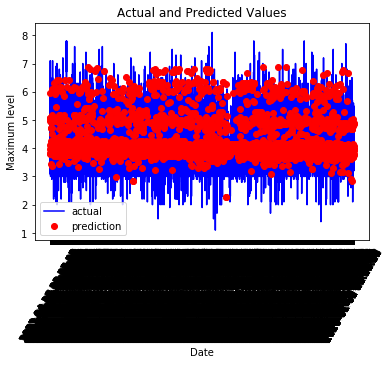

In [81]:
# 真实值
plt.plot(level_true['date'],level_true['actual'], 'b-',label = 'actual')
# 预测值
plt.plot(level_predictions['date'],level_predictions['prediction'],'ro',label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# 图名
plt.xlabel('Date');plt.ylabel('Maximum level');plt.title('Actual and Predicted Values');

In [82]:
# 绘制深度的真实值与预测值的关系图
deep_data = pd.DataFrame(data = {'date':data['time'],'actual':final_data['deep']})
deep_predictions = pd.DataFrame(data = {'date':final_data1['time'],'prediction':unscaled_data['deep']})

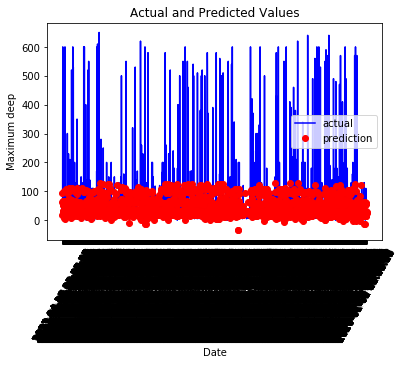

In [83]:
# 真实值
plt.plot(deep_data['date'],deep_data['actual'], 'b-',label = 'actual')
# 预测值
plt.plot(deep_predictions['date'],deep_predictions['prediction'],'ro',label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# 图名
plt.xlabel('Date');plt.ylabel('Maximum deep');plt.title('Actual and Predicted Values');